In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal as mvn

%matplotlib inline

In [2]:
data = pd.read_csv('Enhance_IT/data/exNB.csv', header = None)
data.head()

,0,1,2
0,75.626754,181.704486,1.0
1,70.540408,176.177640,1.0
2,76.875023,178.667364,1.0
3,70.225610,157.504877,1.0
4,74.106298,168.525499,1.0


In [3]:
data.shape

(1000, 3)

In [4]:
X = data.to_numpy()

In [5]:
y = X[:,-1]  # labels = last column of X
X = X[:,:-1]  # removing last column, the label, from X

In [6]:
X.shape

(1000, 2)

In [7]:
y.shape

(1000,)

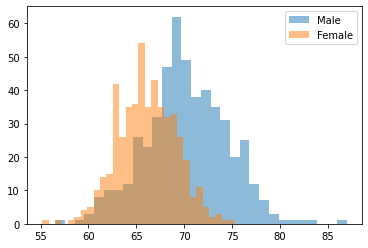

In [8]:
plt.figure()
plt.hist(X[y == 1,0], label = "Male", alpha = 0.5, bins = 30)
plt.hist(X[y == 0,0], label = "Female", alpha = 0.5, bins = 30)
plt.legend()

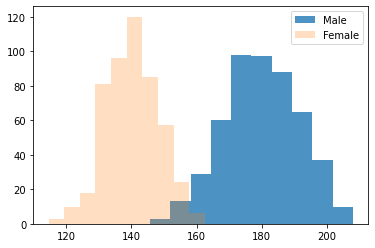

In [9]:
plt.figure()
plt.hist(X[y == 1,1], label = "Male", alpha = 0.8)
plt.hist(X[y == 0,1], label = "Female", alpha = 0.25)
plt.legend()

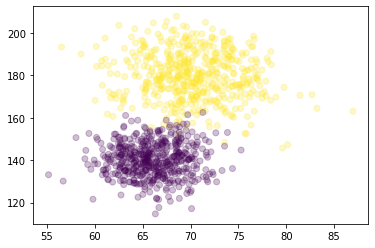

In [10]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.25)

In [11]:
class GaussNB():
    def fit(self, X, y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y == k,:]
            self.likelihoods[k] = {"mean":X_k.mean(axis = 0), "cov":X_k.var(axis = 0) + epsilon}
            self.priors[k] = len(X_k)/len(X)
    
    def predict(self, X):
        N,D = X.shape
        P_hat = np.zeros((N, len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
            
        return P_hat.argmax(axis = 1)
        

In [12]:
gnb = GaussNB()
gnb2 = GaussNB()

In [13]:
gnb.fit(X,y)
y_hat = gnb.predict(X)

In [14]:
def accuracy(y, y_hat):
    return np.mean(y == y_hat)

In [15]:
print(f"Accuracy : {accuracy(y, y_hat):0.3f}")

Accuracy : 0.988


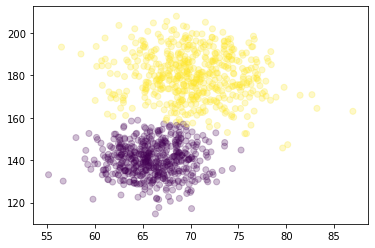

In [16]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c = y_hat, alpha = 0.25)

In [17]:
B = np.array([[67, 158], [67, 170], [67, 175]])

In [18]:
gnb2.fit(X,y)

In [19]:
y_hat2 = gnb2.predict(B)

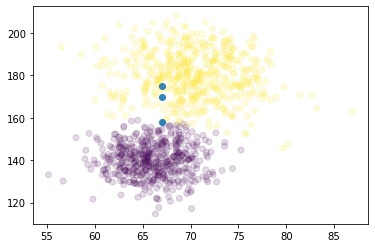

In [20]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c = y_hat, alpha = 0.15)
plt.scatter(B[:,0], B[:,1], alpha = 0.89)

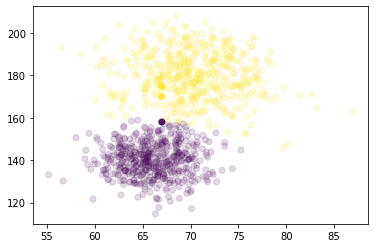

In [21]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c = y_hat, alpha = 0.15)
plt.scatter(B[:,0], B[:,1], c = y_hat2, alpha = 0.89)

In [22]:
y_test = np.array([[0], [1], [1]])
print(f"Accuracy : {accuracy(y_test, y_hat2):0.3f}")

Accuracy : 0.556


In [28]:
class GaussBayes():
    def fit(self, X, y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y == k, :]
            N_k, D = X_k.shape
            mu_k = X_k.mean(axis = 0)
            self.likelihoods[k] = {"mean": X_k.mean(axis = 0), "cov":
                                  (1/(N_k - 1)) * np.matmul((X_k - mu_k).T, X_k - mu_k) + epsilon*np.identity(D)}
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X):
        N, D = X.shape
        
        P_hat = np.zeros((N, len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat[:, k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
            
        return P_hat.argmax(axis = 1)
    

In [29]:
data2 = pd.read_csv('Enhance_IT/data/xor.csv', header = None)
data2.head()

,0,1,2
0,x1,x2,y
1,1.90756725753191,0.3258651323941302,0
2,2.270543675093187,2.2588165178373942,0
3,2.3230857255013344,1.4666014333202204,0
4,0.7524188625064847,2.684304872635828,0


In [38]:
X2 = data2.to_numpy()
X2 = X2[1:,:]  # removing the first row of X
y2 = X2[:,-1]  # labels = last column of X
X2 = X2[:,:-1]  # removing last column, the label, from X

In [39]:
gb = GaussBayes()

In [40]:
gb.fit(X2,y2)
y2_hat = gb.predict(X2)

<ipython-input-28-464cbcf5663c>:11: RuntimeWarning: Mean of empty slice.
  mu_k = X_k.mean(axis = 0)


ZeroDivisionError: division by zero